### Venn diagram showing TandemMod-predicted sites validated by m6A-seq

m6A-seq gene: 12004
TandemMod-predicted gene: 7981


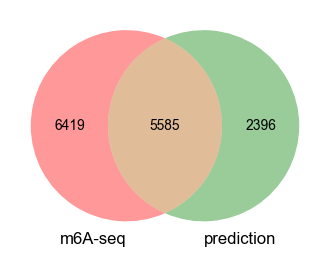

In [5]:
#venn plot gene

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
 
m6A_seq_gene=[]
met_peak="/home/wuyou/Projects/paper/rice/nbt_yuqiong/GSE135549_Nipp_shoot_rep2_gene_MeTPeak.txt"   
t=[]
with open(met_peak) as f:
    for line in f:
        if "name" in line:
            continue
        gene=line.split("\t")[3]
        fold_change=float(line.split("\t")[14])
        
        if gene not in m6A_seq_gene:
            m6A_seq_gene.append(gene)
            t.append(fold_change)
            
predict_gene=[]

m6A_predict="/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv"
with open(m6A_predict) as f:
    for line in f:
        try:
            gene=line.split("\t")[0].split(".")[0]
            Chr=line.split("\t")[3]
            start=line.split("\t")[4]
            end=line.split("\t")[4]

            motif=line.split("\t")[2]
            mod_count=int(line.split("\t")[11])
            unmod_count=int(line.split("\t")[12])
            if unmod_count>5 and mod_count/unmod_count>0.3:
                if gene not in predict_gene:
                    predict_gene.append(gene)
        except:
            print(line)

print("m6A-seq gene:",len(m6A_seq_gene))
print("TandemMod-predicted gene:",len(predict_gene))

plt.figure(figsize=(4,4))
venn2_unweighted([set(m6A_seq_gene), set(predict_gene)],set_labels = ('m6A-seq', 'prediction'))

plt.savefig("figure/supplemental_figure_8a_venn_TandemMod-predicted_gene_overlap_with_m6A-seq.pdf")
plt.show()



### Venn diagram showing m6A sites with decreased and increased modification rate

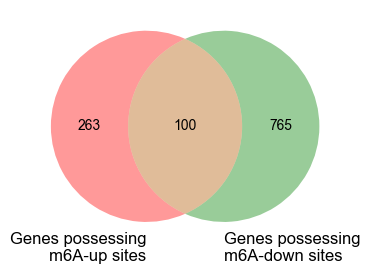

In [9]:
import pandas as pd
from scipy import stats



NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_m6A.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]



up_list=[]
down_list=[]


for i,id in enumerate(NaCl_dict):

    if i%10!=0:
        pass
    if WT_dict[id][0]/WT_dict[id][1]>0.2 or NaCl_dict[id][0]/NaCl_dict[id][1]>0.2:
        
        oddsration,pvalue=stats.fisher_exact([WT_dict[id],NaCl_dict[id]])
       
        if WT_dict[id][0]==0:
            WT_dict[id][0]=1
        if NaCl_dict[id][0]==0:
            NaCl_dict[id][0]=1     

        gene=id.split("|")[0].split(".")[0]
        if pvalue<0.05:


            if WT_dict[id][0]/WT_dict[id][1]<NaCl_dict[id][0]/NaCl_dict[id][1]: #up
              
                if gene not in up_list:

     
                    up_list.append(gene)


            elif WT_dict[id][0]/WT_dict[id][1]>NaCl_dict[id][0]/NaCl_dict[id][1]: #up
                
                
                if gene not in down_list:
    
                    down_list.append(gene)




import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

plt.figure(figsize=(4,4))
venn2_unweighted([set(up_list), set(down_list)],set_labels = ('Genes possessing\nm6A-up sites', 'Genes possessing\nm6A-down sites'))

plt.savefig("figure/supplemental_figure_8b_venn_genes_containing_m6A_sites_with_increased_and_decreased_modification_rate.pdf")
plt.show()

### Venn diagram showing m5C sites with decreased and increased modification rate

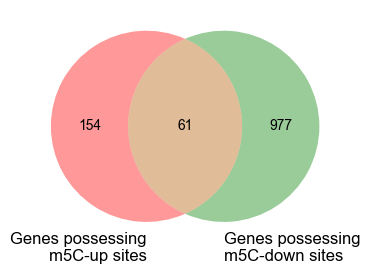

In [12]:
NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_C.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_C.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]


from scipy import stats
up_list=[]
down_list=[]
all_list=[]
count=0
for id in NaCl_dict:
    if WT_dict[id][0]/WT_dict[id][1]>0.2 or NaCl_dict[id][0]/NaCl_dict[id][1]>0.2:
        oddsration,pvalue=stats.fisher_exact([WT_dict[id],NaCl_dict[id]])
        if pvalue<0.05:
            gene=id.split("|")[0].split(".")[0]
            if gene not in all_list:
                all_list.append(gene)
                
            if WT_dict[id][0]/WT_dict[id][1]==NaCl_dict[id][0]/NaCl_dict[id][1]: #up
                print(id)
                
            if WT_dict[id][0]/WT_dict[id][1]<NaCl_dict[id][0]/NaCl_dict[id][1]: #up
                if gene not in up_list:
                    up_list.append(gene)
                    count+=1
            else:
                if gene not in down_list:
                    down_list.append(gene)
                    count+=1


import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

plt.figure(figsize=(4,4))
venn2_unweighted([set(up_list), set(down_list)],set_labels = ('Genes possessing\nm5C-up sites', 'Genes possessing\nm5C-down sites'))

plt.savefig("figure/supplemental_figure_8b_venn_genes_containing_m5C_sites_with_increased_and_decreased_modification_rate.pdf")
plt.show()

### m6A and m5C sites statistics

{0: 17374, 13: 134, 29: 4, 5: 473, 15: 69, 2: 589, 18: 46, 3: 610, 7: 391, 4: 564, 9: 258, 16: 50, 8: 320, 6: 439, 1: 517, 10: 231, 24: 12, 25: 6, 17: 56, 21: 22, 20: 40, 12: 163, 23: 17, 11: 176, 55: 2, 22: 17, 14: 93, 85: 1, 35: 2, 27: 8, 31: 1, 26: 11, 19: 29, 60: 1, 30: 5, 28: 3, 41: 1, 33: 3, 46: 1, 38: 1, 45: 1, 32: 2, 50: 1, 37: 4, 34: 2, 58: 1, 59: 1, 39: 2, 57: 1}


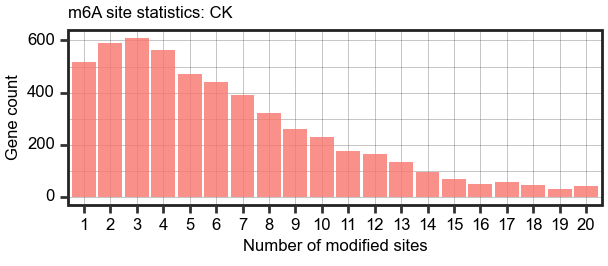

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.04 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/rice_m6A_site_statistics_CK.pdf
findfont: Font family ['Arial'] not found. Falling back to Helvetica.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [13]:
#m6A
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np
import re


NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_m6A.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv")

    
WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    if transcript not in WT_dict:
        WT_dict[transcript]=[]
    
    
    if A_count>=10 and m6A_count/A_count>=0.3:
        WT_dict[transcript].append(site)

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if transcript not in NaCl_dict:
        NaCl_dict[transcript]=[]
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10 and m6A_count/A_count>=0.3:
        NaCl_dict[transcript].append(site)



length_dict_WT={}
for transcript in WT_dict:
    if len(WT_dict[transcript]) not in length_dict_WT:
        length_dict_WT[len(WT_dict[transcript])]=0
    length_dict_WT[len(WT_dict[transcript])]+=1
    
length_dict_NaCl={}
for transcript in NaCl_dict:
    if len(NaCl_dict[transcript]) not in length_dict_NaCl:
        length_dict_NaCl[len(NaCl_dict[transcript])]=0
    length_dict_NaCl[len(NaCl_dict[transcript])]+=1



print(length_dict_WT)

modified_sites=[]
gene_number=[]
for i in range(1,21):
    modified_sites.append(str(i))
    gene_number.append(length_dict_WT.get(i,0))





black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"



plt.rcParams["pdf.use14corefonts"] = True

data=pd.DataFrame({"modified sites":modified_sites,"gene number":gene_number})
#data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['modified sites'] = pd.Categorical(data['modified sites'], categories=pd.unique(data['modified sites']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="modified sites",y="gene number"),alpha=0.8,stat="identity",fill=c1)   
    
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            #axis_text_x=element_text(size=6,family="Monospace",color="black",angle=0),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            #plot_title = element_text(size=6,alpha=1), #change plot title font size 
            figure_size=[1.52*2,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    +labs(title='m6A site statistics: CK',x="Number of modified sites",y="Gene count")
)

print(p)
p.save('figure/supplemental_figure_8d_rice_m6A_site_statistics_CK.pdf')

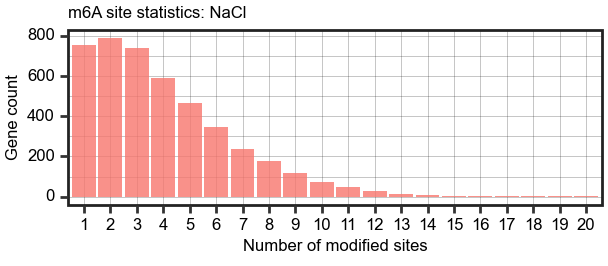

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.04 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_7e_rice_m6A_site_statistics_NaCl.pdf
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont

In [14]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np
import re

modified_sites=[]
gene_number=[]
for i in range(1,21):
    modified_sites.append(str(i))
    gene_number.append(length_dict_NaCl.get(i,0))


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"


plt.rcParams["pdf.use14corefonts"] = True

data=pd.DataFrame({"modified sites":modified_sites,"gene number":gene_number})
#data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['modified sites'] = pd.Categorical(data['modified sites'], categories=pd.unique(data['modified sites']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="modified sites",y="gene number"),alpha=0.8,stat="identity",fill=c1)   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            #axis_text_x=element_text(size=6,family="Monospace",color="black",angle=0),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.52*2,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)

    +labs(title='m6A site statistics: NaCl',x="Number of modified sites",y="Gene count")
)

print(p)
p.save('figure/supplemental_figure_8e_rice_m6A_site_statistics_NaCl.pdf')

{1: 674, 10: 185, 0: 17679, 5: 352, 2: 592, 3: 490, 20: 55, 4: 433, 11: 123, 30: 20, 16: 80, 6: 310, 23: 36, 9: 187, 7: 236, 26: 38, 12: 122, 21: 48, 37: 14, 8: 218, 15: 80, 33: 16, 64: 2, 13: 114, 14: 94, 34: 14, 18: 46, 251: 1, 38: 7, 19: 45, 100: 1, 35: 13, 44: 10, 17: 65, 153: 1, 25: 28, 40: 10, 24: 27, 41: 3, 22: 28, 53: 5, 48: 5, 134: 2, 28: 16, 39: 10, 55: 4, 31: 9, 75: 2, 43: 5, 52: 3, 27: 23, 32: 17, 47: 8, 85: 1, 36: 14, 29: 13, 42: 6, 45: 2, 50: 4, 46: 6, 93: 2, 49: 1, 81: 2, 51: 4, 80: 1, 105: 1, 54: 1, 73: 3, 95: 2, 61: 2, 58: 2, 86: 2, 59: 1, 56: 3, 67: 1, 79: 2, 135: 1, 69: 2, 66: 3, 63: 1}


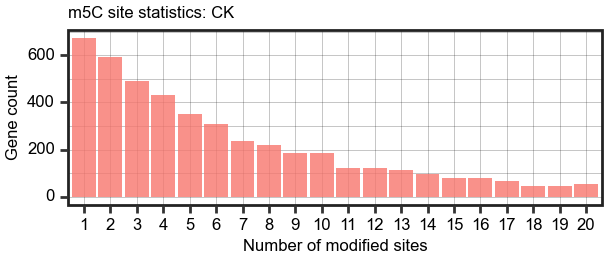

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.04 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_7f_rice_m5C_site_statistics_CK.pdf
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: 

In [15]:
#m5C
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np


NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_C.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_C.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    if transcript not in WT_dict:
        WT_dict[transcript]=[]
    
    
    if A_count>=10 and m6A_count/A_count>=0.3:
        WT_dict[transcript].append(site)

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if transcript not in NaCl_dict:
        NaCl_dict[transcript]=[]
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10 and m6A_count/A_count>=0.3:
        NaCl_dict[transcript].append(site)

length_dict_WT={}
for transcript in WT_dict:
    if len(WT_dict[transcript]) not in length_dict_WT:
        length_dict_WT[len(WT_dict[transcript])]=0
    length_dict_WT[len(WT_dict[transcript])]+=1
    
length_dict_NaCl={}
for transcript in NaCl_dict:
    if len(NaCl_dict[transcript]) not in length_dict_NaCl:
        length_dict_NaCl[len(NaCl_dict[transcript])]=0
    length_dict_NaCl[len(NaCl_dict[transcript])]+=1


print(length_dict_WT)

modified_sites=[]
gene_number=[]
for i in range(1,21):
    modified_sites.append(str(i))
    gene_number.append(length_dict_WT.get(i,0))


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

plt.rcParams["pdf.use14corefonts"] = True

data=pd.DataFrame({"modified sites":modified_sites,"gene number":gene_number})
#data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['modified sites'] = pd.Categorical(data['modified sites'], categories=pd.unique(data['modified sites']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="modified sites",y="gene number"),alpha=0.8,stat="identity",fill=c1)   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            #axis_text_x=element_text(size=6,family="Monospace",color="black",angle=0),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.52*2,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    +labs(title='m5C site statistics: CK',x="Number of modified sites",y="Gene count")
)

print(p)
p.save('figure/supplemental_figure_8f_rice_m5C_site_statistics_CK.pdf')

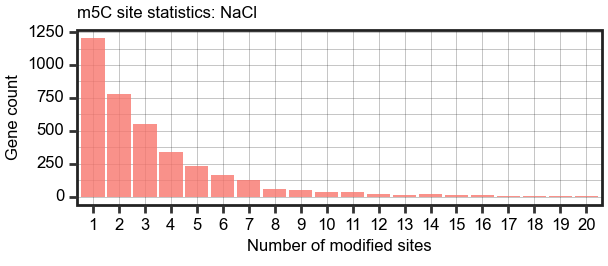

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.04 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_7g_rice_m5C_site_statistics_NaCl.pdf
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont

In [16]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np


modified_sites=[]
gene_number=[]
for i in range(1,21):
    modified_sites.append(str(i))
    gene_number.append(length_dict_NaCl.get(i,0))


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"



plt.rcParams["pdf.use14corefonts"] = True

data=pd.DataFrame({"modified sites":modified_sites,"gene number":gene_number})
#data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['modified sites'] = pd.Categorical(data['modified sites'], categories=pd.unique(data['modified sites']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="modified sites",y="gene number"),alpha=0.8,stat="identity",fill=c1)   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            #axis_text_x=element_text(size=6,family="Monospace",color="black",angle=0),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.52*2,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)

    +labs(title='m5C site statistics: NaCl',x="Number of modified sites",y="Gene count")
)

print(p)
p.save('figure/supplemental_figure_8g_rice_m5C_site_statistics_NaCl.pdf')

### Volcano plot

In [17]:
#m6A

NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_m6A.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]


/tmp/ipykernel_42211/135120024.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_42211/135120024.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_42211/135120024.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/wuyou/.conda/e

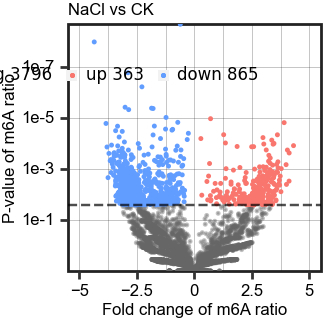

In [18]:
from scipy import interpolate
import traceback
from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import pandas as pd

id_list=[]
CK=[]
NaCl=[]

from scipy import stats
up_list=[]
down_list=[]
no_sig_list=[]
all_list=[]
exp_list=[]

fold_change_list=[]
p_value_list=[]
color=[]


for i,id in enumerate(NaCl_dict):

    if i%10!=0:
        pass
    if WT_dict[id][0]/WT_dict[id][1]>0.2 or NaCl_dict[id][0]/NaCl_dict[id][1]>0.2:
        
        oddsration,pvalue=stats.fisher_exact([WT_dict[id],NaCl_dict[id]])
       
        if WT_dict[id][0]==0:
            WT_dict[id][0]=1
        if NaCl_dict[id][0]==0:
            NaCl_dict[id][0]=1     

        gene=id.split("|")[0].split(".")[0]
        if pvalue<0.05:
            exp_list.append([id,WT_dict[id][0]/WT_dict[id][1],NaCl_dict[id][0]/NaCl_dict[id][1]])
            #gene=id.split("|")[0].split(".")[0]
            if gene not in all_list:
                all_list.append(gene)
            if WT_dict[id][0]/WT_dict[id][1]<NaCl_dict[id][0]/NaCl_dict[id][1]: #up
              
                if gene not in up_list:
                    color.append("up")
                    p_value_list.append(pvalue)
                    up_list.append(gene)
                    fold_change_list.append(NaCl_dict[id][0]/NaCl_dict[id][1]/(WT_dict[id][0]/WT_dict[id][1]))
                    id_list.append(id)
            elif WT_dict[id][0]/WT_dict[id][1]>NaCl_dict[id][0]/NaCl_dict[id][1]: #up
                
                
                if gene not in down_list:
                    color.append("down")
                    p_value_list.append(pvalue)
                    down_list.append(gene)
                    fold_change_list.append(NaCl_dict[id][0]/NaCl_dict[id][1]/(WT_dict[id][0]/WT_dict[id][1]))
                    id_list.append(id)

        else:
            
            if gene not in no_sig_list:
                p_value_list.append(pvalue)
                color.append("no sig")
                no_sig_list.append(gene)
                fold_change_list.append(NaCl_dict[id][0]/NaCl_dict[id][1]/(WT_dict[id][0]/WT_dict[id][1]))
                id_list.append(id)
        
        CK.append(WT_dict[id][0]/WT_dict[id][1])
        NaCl.append(NaCl_dict[id][0]/NaCl_dict[id][1])
count=0


data=pd.DataFrame({"id":id_list,"Fold change":fold_change_list,"P-value":p_value_list,"color":color})
data["P-value"]=-np.log10(data["P-value"])

data["Fold change"]=np.log2(data["Fold change"])

up=data[data["color"]=="up"]
down=data[data["color"]=="down"]
no_sig=data[data["color"]=="no sig"]

up["color"]="up %s" %len(up)
down["color"]="down %s" %len(down)
no_sig["color"]="no sig %s" %len(no_sig)

p2=(ggplot()
    +geom_point(no_sig,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=0.4)
    +geom_point(up,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=1)
    +geom_point(down,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=1)
    #+geom_vline(xintercept=1,linetype="dashed",alpha=0.7) # add one vertical line
    #+geom_vline(xintercept=-1,linetype="dashed",alpha=0.7) # add one vertical line
    +geom_hline(yintercept=1.3,linetype="dashed",alpha=0.7) # add one vertical line    -log10(0.05)=1.3
    #+annotate("text",x=-1,y=0.95,label=p_text,ha="left",size=8,color="black")
    #+geom_smooth(method="lm",color="#F8766D",size=0.3)
    #+geom_line(data_unmod,aes(x="x",y="value",group="variable"),alpha=0.05,color="black")
    +theme(
        figure_size=[1.62,1.62],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6,alpha=1),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.3,0.80), 
        legend_key=element_rect(alpha=1),
        legend_key_size=4) #change legend text font size))
    +labs(x = "Fold change of m6A ratio")
    +labs(y = "P-value of m6A ratio")
    +scale_color_manual(values=[gray,c1,c3]) 
    +xlim([-5,5])
    +ylim([0,8])
    +ggtitle("NaCl vs CK")
    + scale_y_discrete(limits=["1e-1","1e-3","1e-5","1e-7"], reverse=False)
   )    
print(p2)
p2.save('figure/supplemental_figure_8i_volvano_plot_rice_mod_ratio_m6A.pdf')    


In [20]:
#m5C

NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_C.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_C.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]

/tmp/ipykernel_42211/2673296386.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_42211/2673296386.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_42211/2673296386.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/wuyou/.con

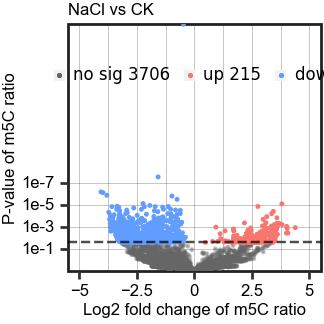

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.62 x 1.62 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_7j_volvano_plot_rice_mod_ratio_m5C.pdf
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [21]:
#volcano plot
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"


id_list=[]
CK=[]
NaCl=[]



from scipy import stats
up_list=[]
down_list=[]
no_sig_list=[]
all_list=[]
exp_list=[]

fold_change_list=[]
p_value_list=[]
color=[]


for id in NaCl_dict:

    if WT_dict[id][0]/WT_dict[id][1]>0.2 or NaCl_dict[id][0]/NaCl_dict[id][1]>0.2:
        
        
        
        oddsration,pvalue=stats.fisher_exact([WT_dict[id],NaCl_dict[id]])
        if WT_dict[id][0]==0:
            WT_dict[id][0]=1
        if NaCl_dict[id][0]==0:
            NaCl_dict[id][0]=1
              
        gene=id.split("|")[0].split(".")[0]
        if pvalue<0.05:
            exp_list.append([id,WT_dict[id][0]/WT_dict[id][1],NaCl_dict[id][0]/NaCl_dict[id][1]])
            #gene=id.split("|")[0].split(".")[0]
            if gene not in all_list:
                all_list.append(gene)
            if WT_dict[id][0]/WT_dict[id][1]<NaCl_dict[id][0]/NaCl_dict[id][1]: #up
                
                
                #print(WT_dict[id][0],WT_dict[id][1],NaCl_dict[id][0],NaCl_dict[id][1])
                if gene not in up_list:
                    fold_change_list.append((NaCl_dict[id][0]/NaCl_dict[id][1])/(WT_dict[id][0]/WT_dict[id][1]))
                    p_value_list.append(pvalue)
                    id_list.append(id)
                    color.append("up")
                    up_list.append(gene)
            elif WT_dict[id][0]/WT_dict[id][1]>NaCl_dict[id][0]/NaCl_dict[id][1]: #down
                
                
                
                if gene not in down_list:
                    fold_change_list.append((NaCl_dict[id][0]/NaCl_dict[id][1])/(WT_dict[id][0]/WT_dict[id][1]))
                    p_value_list.append(pvalue)
                    id_list.append(id)
                    color.append("down")
                    down_list.append(gene)

        else:
            if gene not in no_sig_list:
                fold_change_list.append((NaCl_dict[id][0]/NaCl_dict[id][1])/(WT_dict[id][0]/WT_dict[id][1]))
                p_value_list.append(pvalue)
                id_list.append(id)
                color.append("no sig")
                no_sig_list.append(gene)

        
        CK.append(WT_dict[id][0]/WT_dict[id][1])
        NaCl.append(NaCl_dict[id][0]/NaCl_dict[id][1])
count=0
#up_list=""


data=pd.DataFrame({"id":id_list,"Fold change":fold_change_list,"P-value":p_value_list,"color":color})
data["P-value"]=-np.log10(data["P-value"])

data["Fold change"]=np.log2(data["Fold change"])

up=data[data["color"]=="up"]
down=data[data["color"]=="down"]
no_sig=data[data["color"]=="no sig"]

up["color"]="up %s" %len(up)
down["color"]="down %s" %len(down)
no_sig["color"]="no sig %s" %len(no_sig)

p2=(ggplot()
    +geom_point(no_sig,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=0.4)
    +geom_point(up,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=1)
    +geom_point(down,aes(x="Fold change",y="P-value",color="color"),size=0.001,alpha=1)
    #+geom_vline(xintercept=1,linetype="dashed",alpha=0.7) # add one vertical line
    #+geom_vline(xintercept=-1,linetype="dashed",alpha=0.7) # add one vertical line
    +geom_hline(yintercept=1.3,linetype="dashed",alpha=0.7) # add one vertical line    -log10(0.05)=1.3
    #+annotate("text",x=-1,y=0.95,label=p_text,ha="left",size=8,color="black")
    #+geom_smooth(method="lm",color="#F8766D",size=0.3)
    #+geom_line(data_unmod,aes(x="x",y="value",group="variable"),alpha=0.05,color="black")
    +theme(
        figure_size=[1.62,1.62],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6,alpha=1),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.68,0.80), 
        legend_key=element_rect(alpha=1),
        legend_key_size=4) #change legend text font size))
    +labs(x = "Log2 fold change of m5C ratio")
    +labs(y = "P-value of m5C ratio")
    +scale_color_manual(values=[gray,c1,c3]) 
    +xlim([-5,5])
    +ylim([0,8])
    +ggtitle("NaCl vs CK")
    + scale_y_discrete(limits=["1e-1","1e-3","1e-5","1e-7"], reverse=False)
   )    
print(p2)
p2.save('figure/supplemental_figure_8j_volvano_plot_rice_mod_ratio_m5C.pdf')                